# **Advanced Stock Price Prediction System** 

In the dynamic world of financial markets, predicting stock prices is a challenging yet crucial task for investors, traders, and financial analysts. The integration of advanced technologies, data analytics, and machine learning has paved the way for the development of sophisticated stock price prediction systems. 

These systems aim to leverage historical stock data, market indicators, and various features to generate more accurate and informed predictions.

The Stock Trend Prediction project leverages advanced machine learning techniques, specifically the **Long Short-Term Memory (LSTM)** neural network architecture, to forecast stock prices based on historical data.


 Utilizing the “**yfinance library**” , the project collects and preprocesses extensive stock price data, transforming it into sequences suitable for training the LSTM model.

 The methodology involves splitting the dataset into training and testing sets, training the model on past 100 and 200 days' stock prices, and evaluating its performance using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


The project incorporates the Streamlit framework to create an interactive web application, providing users with a dynamic platform to visualize stock trends. Users can input a stock ticker symbol, and the LSTM model dynamically predicts and displays future stock prices, allowing for real-time analysis and decision-making.


**Key Components of the Advanced Stock Price Prediction System:**

- Data Collection and Processing:

    - Historical Stock Data: Gathering and organizing historical stock prices, trading volumes, and other relevant financial indicators.
    - Market News and Sentiment Analysis: Incorporating sentiment analysis of news articles, social media, and financial reports to gauge market sentiment.

- Feature Engineering:

    - Extracting meaningful features from raw data, including technical indicators (moving averages, RSI, MACD), fundamental ratios, and economic indicators.

- Machine Learning Models:

    - Time Series Models: Utilizing advanced time series forecasting models such as Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRU).
    - Ensemble Learning: Implementing ensemble methods like Random Forests or Gradient Boosting to combine predictions from multiple models.
    - Reinforcement Learning: Exploring reinforcement learning techniques for adaptive decision-making in response to changing market conditions.
- Deep Learning Architectures:

    - Neural Networks: Employing deep neural networks with multiple layers to capture intricate patterns and relationships in the data.
    - Convolutional Neural Networks (CNNs): Applying CNNs for analyzing stock chart patterns and extracting relevant features.
- Evaluation Metrics:

    - Sharpe Ratio, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE): Quantifying the performance of the prediction models.
    - Backtesting: Simulating the model's performance using historical data to assess its effectiveness in a real-world scenario.
- Real-Time Integration:

    - Streaming Data: Incorporating real-time stock prices and relevant news to update predictions dynamically.
    - API Integration: Connecting the prediction system to financial data APIs for seamless data retrieval and model deployment.
- User Interface and Visualization:

    - Creating an intuitive user interface for users to interact with the prediction system.
    - Visualizing Predictions: Presenting predictions and model performance through charts, graphs, and dashboards.
- Risk Management:

    - Implementing risk management strategies to mitigate potential losses and optimize portfolio performance.

**In conclusion, the Advanced Stock Price Prediction System represents a fusion of cutting-edge technologies and financial expertise to enhance decision-making in the volatile world of stock markets. As financial markets continue to evolve, these systems play a pivotal role in empowering investors with actionable insights and intelligent predictions.**

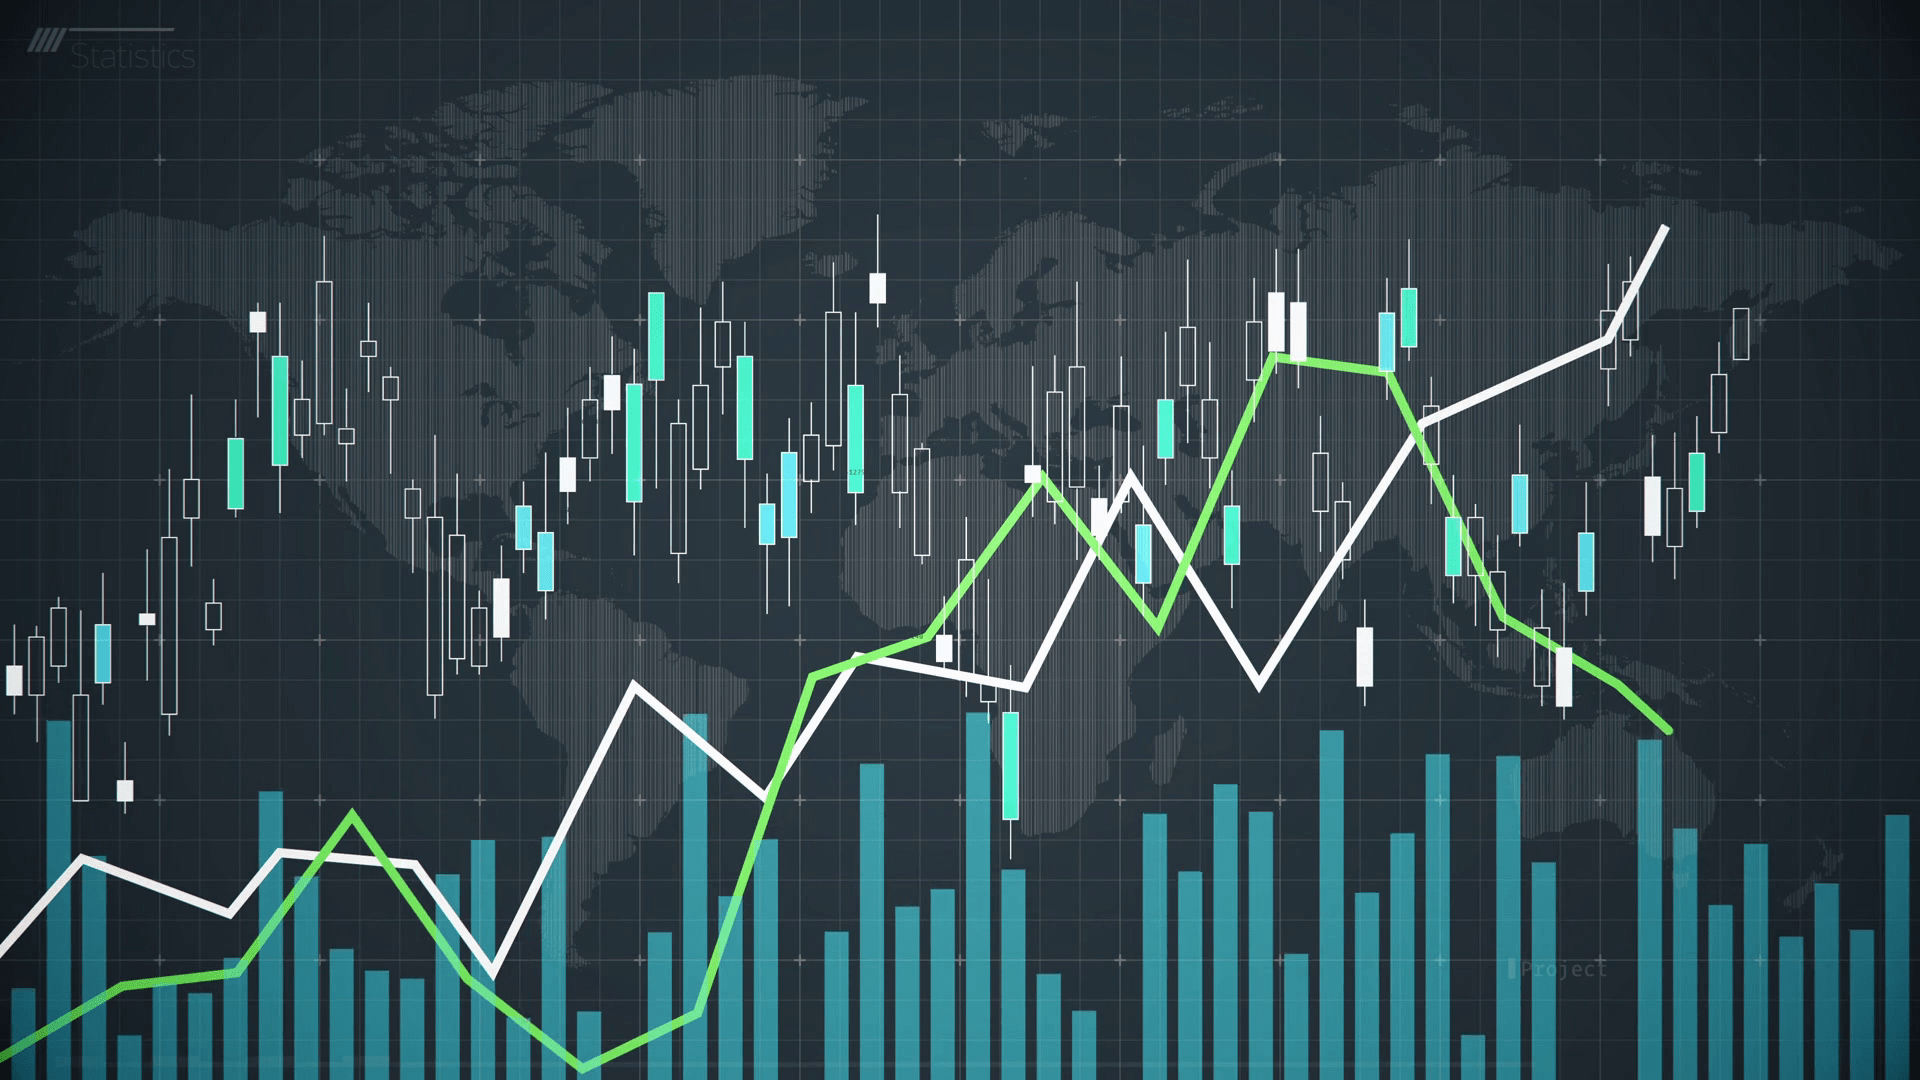

### Importing necessary Libraries

In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import streamlit as st

C:\Users\Lenovo\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


### Exploratory Data Analysis

In [2]:
start = '2012-01-01'
end = '2023-12-31'
stock_symbol = 'TSLA'
#'TSLA'==>'Tesla'

ts_df = yf.download(stock_symbol, start=start, end=end)

# Resetting Index
ts_df = ts_df.reset_index()
ts_df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


In [3]:
ts_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3013,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
3014,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
3015,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
3016,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
3017,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


In [4]:
ts_df. describe()

,Open,High,Low,Close,Adj Close,Volume
count,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3.018000e+03
mean,79.200165,80.946282,77.319941,79.178199,79.178199,1.064283e+08
std,104.619883,106.955932,102.046536,104.535965,104.535965,7.943636e+07
min,1.774667,1.790000,1.509333,1.519333,1.519333,5.473500e+06
25%,13.831500,14.051000,13.587000,13.818667,13.818667,5.802675e+07
50%,18.900333,19.239333,18.574666,18.954333,18.954333,8.896350e+07
75%,159.657497,161.569996,153.244999,159.730003,159.730003,1.305753e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [5]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3018 non-null   datetime64[ns]
 1   Open       3018 non-null   float64       
 2   High       3018 non-null   float64       
 3   Low        3018 non-null   float64       
 4   Close      3018 non-null   float64       
 5   Adj Close  3018 non-null   float64       
 6   Volume     3018 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 165.2 KB


In [6]:
ts_df.shape

(3018, 7)

In [7]:
ts_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
ts_df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4296\3906007463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ts_df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999713,0.999601,0.999174,0.999174,0.025495
High,0.999713,1.000000,0.999609,0.999629,0.999629,0.029395
Low,0.999601,0.999609,1.000000,0.999668,0.999668,0.021865
Close,0.999174,0.999629,0.999668,1.000000,1.000000,0.026485
Adj Close,0.999174,0.999629,0.999668,1.000000,1.000000,0.026485
Volume,0.025495,0.029395,0.021865,0.026485,0.026485,1.000000


In [9]:
ts_df.duplicated().sum()

0

Text(0.5, 1.0, 'TSLA')

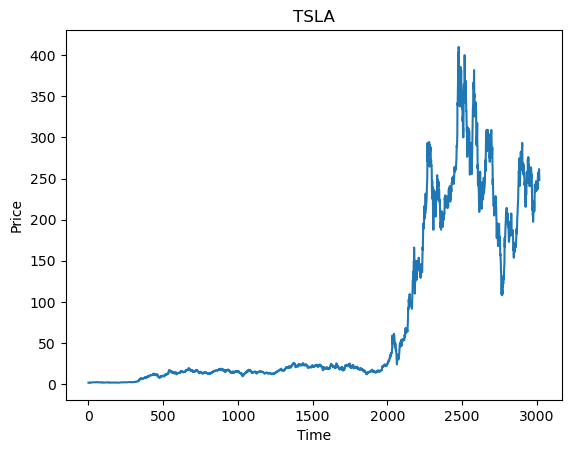

In [10]:
#Using only the close column for this project and accordingly ploltting the graph
plt.plot(ts_df.Close)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(stock_symbol)

Text(0.5, 1.0, 'TSLA')

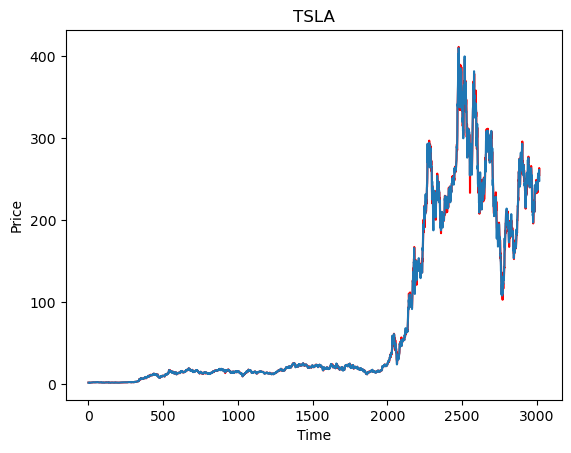

In [11]:
plt.plot(ts_df.Open, color = 'r')
plt.plot(ts_df.Close)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(stock_symbol)

Text(0.5, 1.0, 'TSLA')

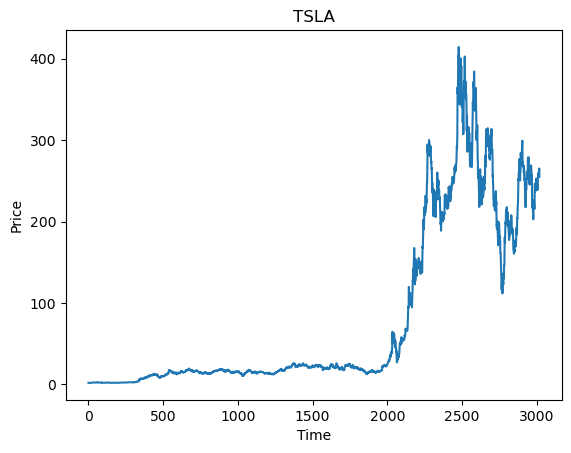

In [12]:
plt.plot(ts_df.High)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(stock_symbol)

Text(0.5, 1.0, 'TSLA')

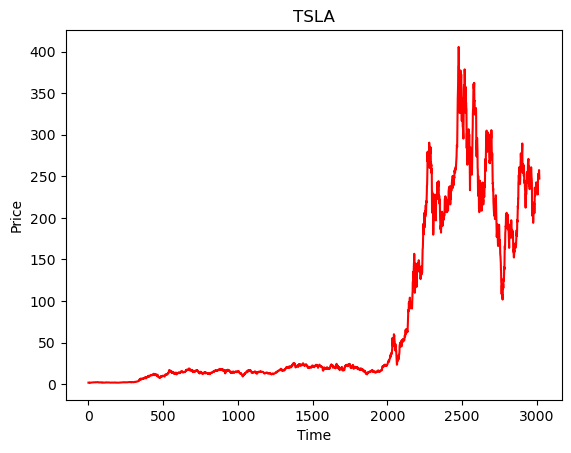

In [13]:
plt.plot(ts_df.Low,c = 'r')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(stock_symbol)

### Removing features for next operation

In [14]:
#removing the columns of Date, AdjClose
ts_df = ts_df.drop(['Date', 'Adj Close'], axis = 1)
ts_df.head()

,Open,High,Low,Close,Volume
0,1.929333,1.966667,1.843333,1.872000,13921500
1,1.880667,1.911333,1.833333,1.847333,9451500
2,1.850667,1.862000,1.790000,1.808000,15082500
3,1.813333,1.852667,1.760667,1.794000,14794500
4,1.800000,1.832667,1.741333,1.816667,13455000


### Calculating moving averages
#### Calculating moving averages for 100 days

In [15]:
#caluclating moving average for 100 days
ma100 = ts_df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3013    241.505100
3014    241.477999
3015    241.553799
3016    241.571099
3017    241.558899
Name: Close, Length: 3018, dtype: float64

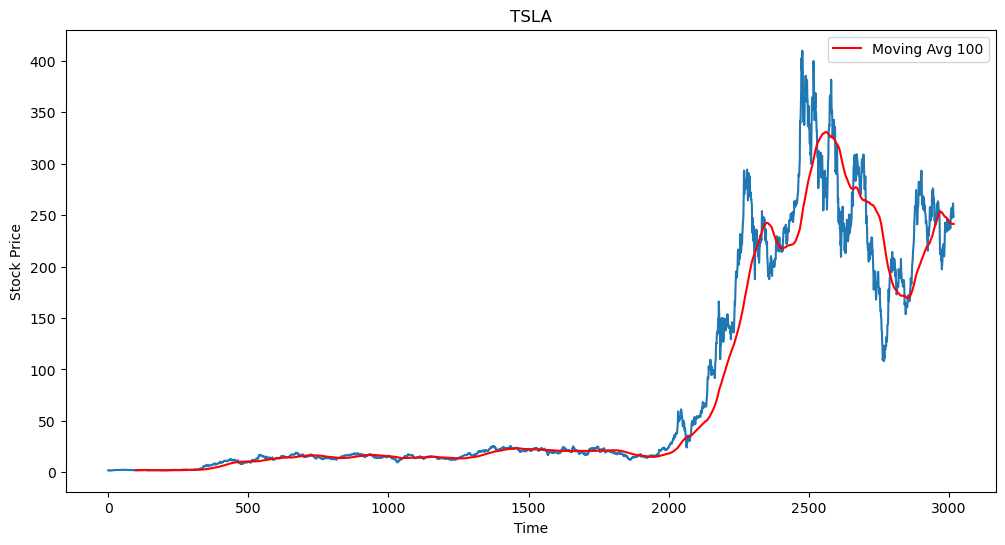

In [16]:
plt.figure(figsize = (12,6))
plt.plot(ts_df.Close)
plt.plot(ma100, 'r', label = 'Moving Avg 100')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(stock_symbol)
plt.legend()

#### Calculating moving average for 200 days

In [17]:
#caluclating moving average for 200 days
ma200 = ts_df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3013    227.70775
3014    228.12360
3015    228.55840
3016    228.90800
3017    229.24815
Name: Close, Length: 3018, dtype: float64

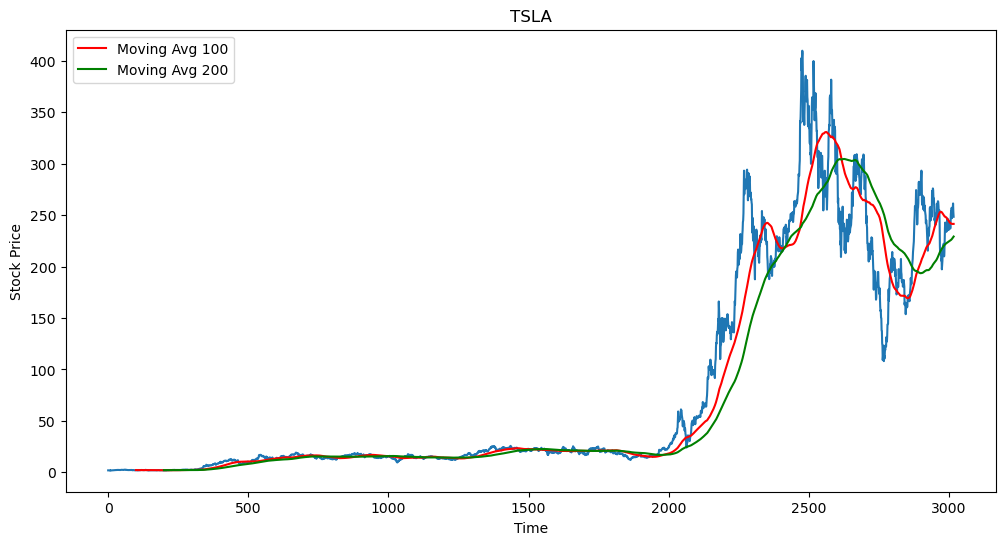

In [18]:
plt.figure(figsize = (12,6))
plt.plot(ts_df.Close)
plt.plot(ma100, 'r', label = 'Moving Avg 100')
plt.plot(ma200, 'g' , label = 'Moving Avg 200')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(stock_symbol)
plt.legend()

## Splitting Data for Training
### Splitting Dataset for Training and Testing

In [19]:
#Splitting the data into training and testing

#  68% data is Training Data
data_training = pd.DataFrame(ts_df['Close'][0:int(len(ts_df)*0.68)])

#  30% Data is Testing Data
data_testing = pd.DataFrame(ts_df['Close'][int(len(ts_df)*0.68):int(len(ts_df))])

print(data_training.shape)
print(data_testing.shape)

(2052, 1)
(966, 1)


In [20]:
data_training.head()

,Close
0,1.872000
1,1.847333
2,1.808000
3,1.794000
4,1.816667


In [21]:
data_testing.head()

,Close
2052,49.574669
2053,49.700668
2054,49.966667
2055,48.302666
2056,46.898666


## Scaling Data with the help of MinMaxScaler

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00591306],
       [0.00549948],
       [0.00483999],
       ...,
       [0.84505326],
       [0.73349879],
       [0.72119201]])

In [24]:
data_training_array.shape

(2052, 1)

## Dividing Data in X-Train and Y-Train

In [25]:
x_train = []
y_train = []


#Taking the stock price for 100 days
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])  #from 0th index till 100th
    y_train.append(data_training_array[i,0])      #considering only 1 column


x_train, y_train = np.array(x_train), np.array(y_train)

## Importing Necessary libraries for Machine Learning Model creation

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60 , activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80 , activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))


model.add(LSTM(units = 120 , activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

## Training Model

In [29]:
model.compile(optimizer = 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
61/61 [==============================] - 29s 377ms/step - loss: 0.0141
Epoch 2/50
61/61 [==============================] - 21s 349ms/step - loss: 0.0046
Epoch 3/50
61/61 [==============================] - 21s 351ms/step - loss: 0.0037
Epoch 4/50
61/61 [==============================] - 22s 354ms/step - loss: 0.0032
Epoch 5/50
61/61 [==============================] - 21s 352ms/step - loss: 0.0025
Epoch 6/50
61/61 [==============================] - 21s 350ms/step - loss: 0.0025
Epoch 7/50
61/61 [==============================] - 23s 373ms/step - loss: 0.0024
Epoch 8/50
61/61 [==============================] - 23s 380ms/step - loss: 0.0024
Epoch 9/50
61/61 [==============================] - 23s 380ms/step - loss: 0.0024
Epoch 10/50
61/61 [==============================] - 16s 271ms/step - loss: 0.0019
Epoch 11/50
61/61 [==============================] - 16s 266ms/step - loss: 0.0026
Epoch 12/50
61/61 [==============================] - 16s 266ms/step - loss: 0.0019
Epoch 13/50
6

In [30]:
model.save('keras_model.h5')

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
data_testing.head()

,Close
2052,49.574669
2053,49.700668
2054,49.966667
2055,48.302666
2056,46.898666


In [32]:
past_100_days = data_training.tail(100)

In [33]:
type(past_100_days)

pandas.core.frame.DataFrame

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [35]:
final_df.head()

,Close
0,15.848000
1,16.003332
2,16.302000
3,16.316000
4,16.525999


In [36]:
final_df.tail()

,Close
1061,252.539993
1062,256.609985
1063,261.440002
1064,253.179993
1065,248.479996


## Again Scaling

In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00000000e+00],
       [3.94123050e-04],
       [1.15192877e-03],
       ...,
       [6.23137003e-01],
       [6.02179001e-01],
       [5.90253767e-01]])

In [38]:
input_data.shape

(1066, 1)

In [39]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(966, 100, 1)
(966,)


## Predicting Values

In [41]:
y_predicted = model.predict(x_test)

31/31 [==============================] - 4s 96ms/step


In [42]:
y_predicted.shape

(966, 1)

In [43]:
y_test

array([0.08557419, 0.08589388, 0.0865688 , 0.08234675, 0.0787844 ,
       0.06263374, 0.06894819, 0.06707061, 0.05460745, 0.05225117,
       0.03507374, 0.03255845, 0.02089032, 0.03212542, 0.03210681,
       0.03325028, 0.04521105, 0.05100451, 0.04912861, 0.04679431,
       0.04472558, 0.04842494, 0.04124611, 0.03666378, 0.04098393,
       0.04711232, 0.05205326, 0.05262668, 0.05671341, 0.06989883,
       0.07986867, 0.08324157, 0.08584314, 0.08731138, 0.08603765,
       0.07594941, 0.08362724, 0.07914808, 0.08244994, 0.09489955,
       0.08988756, 0.09519726, 0.09204595, 0.07841903, 0.08854618,
       0.08973364, 0.09216436, 0.09173471, 0.09839592, 0.09702072,
       0.09670271, 0.09358185, 0.09567426, 0.09497059, 0.09741654,
       0.0964659 , 0.097743  , 0.09977959, 0.09796628, 0.09830289,
       0.09853294, 0.09609377, 0.10103133, 0.11170484, 0.10890706,
       0.10914387, 0.10600102, 0.10960058, 0.12047031, 0.11890565,
       0.13317874, 0.12434729, 0.11799392, 0.12740217, 0.12591

In [44]:
y_predicted

array([[0.08895322],
       [0.09002361],
       [0.09102806],
       [0.0919701 ],
       [0.09285305],
       [0.09367974],
       [0.09445098],
       [0.09516837],
       [0.095834  ],
       [0.09644619],
       [0.09700166],
       [0.09749041],
       [0.09789693],
       [0.09819236],
       [0.09834041],
       [0.09828817],
       [0.09798683],
       [0.09743565],
       [0.09667639],
       [0.09576202],
       [0.09473966],
       [0.09364355],
       [0.09251057],
       [0.09135254],
       [0.09015562],
       [0.08891413],
       [0.08764821],
       [0.0863989 ],
       [0.08521375],
       [0.08415058],
       [0.08327413],
       [0.08262352],
       [0.08221605],
       [0.08205099],
       [0.08210988],
       [0.08236544],
       [0.08278436],
       [0.08333439],
       [0.08398486],
       [0.08470892],
       [0.0854858 ],
       [0.08629797],
       [0.08713756],
       [0.08799541],
       [0.08885987],
       [0.08972439],
       [0.09058386],
       [0.091

In [45]:
scaler.scale_

array([0.00253729])

In [46]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
print('y_pred: ',y_predicted)
y_test = y_test * scale_factor
print('y_test:',y_test)

y_pred:  [[ 4.189474 ]
 [ 4.2398868]
 [ 4.2871943]
 [ 4.331562 ]
 [ 4.3731465]
 [ 4.4120817]
 [ 4.4484053]
 [ 4.482192 ]
 [ 4.5135417]
 [ 4.542374 ]
 [ 4.5685353]
 [ 4.5915546]
 [ 4.6107006]
 [ 4.6246147]
 [ 4.6315875]
 [ 4.629127 ]
 [ 4.614935 ]
 [ 4.5889754]
 [ 4.553216 ]
 [ 4.510152 ]
 [ 4.4620013]
 [ 4.410377 ]
 [ 4.3570166]
 [ 4.302476 ]
 [ 4.2461042]
 [ 4.187633 ]
 [ 4.128011 ]
 [ 4.0691724]
 [ 4.013355 ]
 [ 3.9632816]
 [ 3.922003 ]
 [ 3.8913612]
 [ 3.8721702]
 [ 3.8643966]
 [ 3.8671699]
 [ 3.8792062]
 [ 3.8989365]
 [ 3.9248412]
 [ 3.955477 ]
 [ 3.9895785]
 [ 4.0261674]
 [ 4.064419 ]
 [ 4.103961 ]
 [ 4.144364 ]
 [ 4.1850777]
 [ 4.2257943]
 [ 4.2662735]
 [ 4.3064337]
 [ 4.345982 ]
 [ 4.385455 ]
 [ 4.4241076]
 [ 4.4619184]
 [ 4.4990873]
 [ 4.535663 ]
 [ 4.5713377]
 [ 4.6063523]
 [ 4.6407723]
 [ 4.6732984]
 [ 4.7028847]
 [ 4.731058 ]
 [ 4.7585444]
 [ 4.7851367]
 [ 4.810608 ]
 [ 4.835465 ]
 [ 4.8595285]
 [ 4.8822737]
 [ 4.903802 ]
 [ 4.9246736]
 [ 4.945411 ]
 [ 4.966404 ]
 [ 4.98788 

## Final Prediction

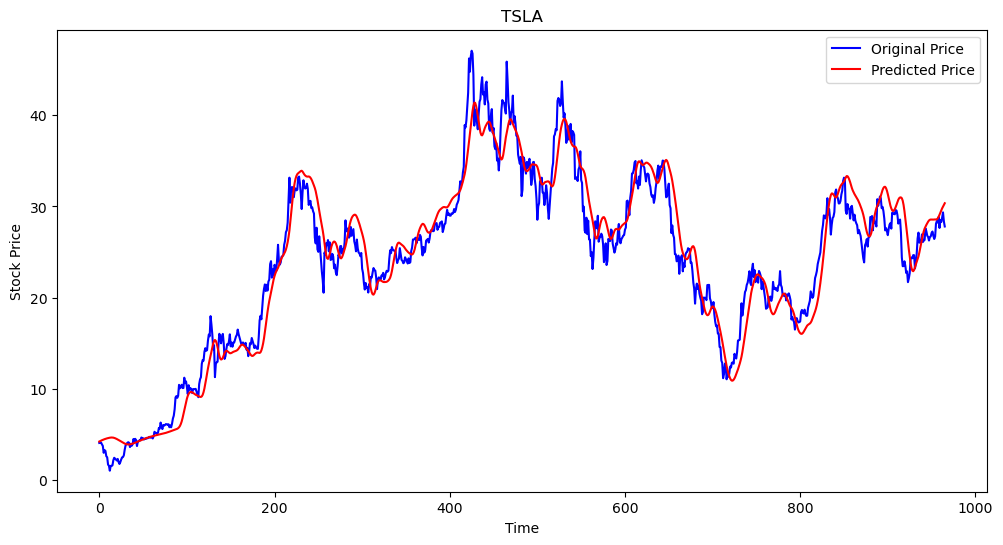

In [47]:
#Final Prediction

plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(stock_symbol)
plt.legend()
plt.show()